<a href="https://colab.research.google.com/github/skdding3/Basic_statistic/blob/main/%EA%B9%80%EC%84%A0%EA%B8%B0/Stats_Polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다항회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 변환.

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

#y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값

y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀계수 [-1.61].
Degree 1 MSE 0.4077289625098685.

Degree 4 회귀계수 [  0.47 -17.79  23.59  -7.26].
Degree 4 MSE 0.043208749872320706.

Degree 15 회귀계수 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08].
Degree 15 MSE 180526263.3177066.


<function matplotlib.pyplot.show>

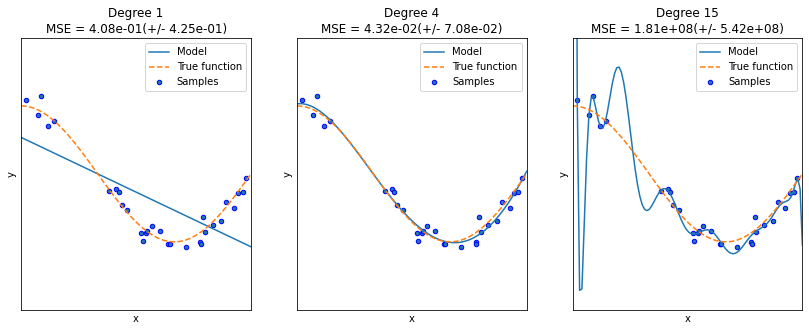

In [ ]:
plt.figure(figsize = (14,5))
degrees = [1,4,15]

#다항 회귀의 차수(degree)를 14,15로 각각 변화시키면서 비교

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    #개별 degree 별로 polynomial 변환
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    
    pipeline.fit(X.reshape(-1, 1), y)

    #교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring = "neg_mean_squared_error", cv=10)
    #pipeline을 구성하는 세부 객체를 접근하는 named_steps["객체명"]을 이용해 회귀 계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀계수 {1}.'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE {1}.'.format(degrees[i], -1*np.mean(scores)))

    #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    #테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)
    #예측 값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    #실제 값 곡선
    plt.plot(X_test, true_fun(X_test),'--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel('x');
    plt.ylabel('y');
    plt.xlim((0,1));
    plt.ylim((-2,2));
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show

다항식의 차수가 지나치게 높을땐 오히려 왜곡 되는 것을 확인할 수 있다.

반면에 차수가 너무 작으면 데이터를 충분히 표현하지 못한다. 
직선보다 복잡한 회귀선을 제작한다고 성능이 올라가는 것이 아닌 과적합 문제가 발생한다.
그래서 최적의 차수를 정하는 것 (편향과 분산의 트레이드 오프)이 다항회귀에서 중요한 포인트다.

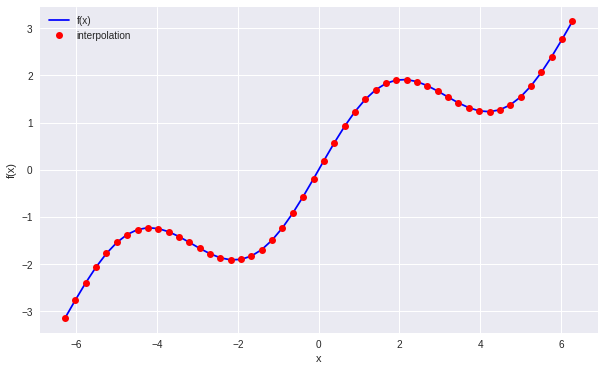

In [ ]:
import scipy.interpolate as spi
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

#plot 그리기
def create_plot(x,y,styles, labels,axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i],y[i],styles[i],label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

#x값
x= np.linspace(-2*np.pi,2*np.pi,50)

#f(x) 
def f(x):
    return np.sin(x)+0.5*x

#스플라인 곡선 만들기(k=1,2,3,4.5 가능)
ipo = spi.splrep(x,f(x),k=1)
#스플라인 곡선에서의 y값
iy = spi.splev(x,ipo)

#그리기
create_plot([x,x],[f(x),iy],['b','ro'],['f(x)','interpolation'],['x','f(x)'])

시계열 데이터 보간

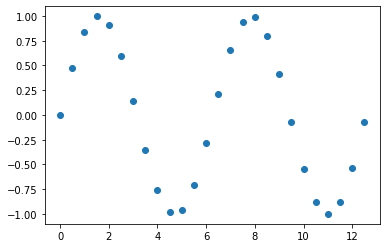

In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

## generating the original data with misiing values

x = np.arange(0, 4*np.pi, 0.5)
y = np.sin(x)

plt.plot (x, y, "o")
plt.show()

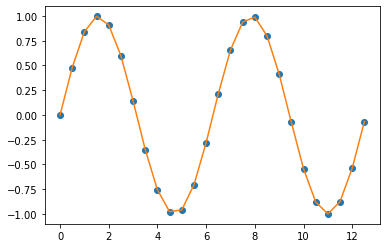

In [ ]:

f_quad = interpolate.interp1d(x,y, kind='quadratic')#next

y_new_quad = f_quad(x)

plt.plot(x,y,"o", x, y_new_quad, '-')
plt.show()

일반화가법모형


In [2]:
pip install pygam

     |████████████████████████████████| 1.8 MB 5.5 MB/s 


100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  del sys.path[0]
N/A% (0 of 125) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     13.7894
Link Function:                     IdentityLink Log Likelihood:                                -24122.8975
Number of Samples:                         3000 AIC:                                            48275.3738
                                                AICc:                                           48275.5303
                                                GCV:                                             1248.7894
                                                Scale:                                           1238.4616
                                                Pseudo R-Squared:                                   0.2918
Feature Function                  Lam

100% (125 of 125) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


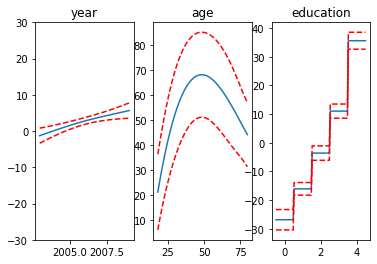

In [3]:
from pygam import LinearGAM, s,f
from pygam.datasets import wage
import matplotlib.pyplot as plt
import numpy as np

##Sample Data
X,y = wage(return_X_y = True)

## Fitting 

gam = LinearGAM(s(0) + s(1, n_splines = 5) + f(2))
gam.gridsearch(X, y)
gam.summary()
gam.lam

## Prediction
gam.predict(X)
gam.prediction_intervals(X, width=.95)

##Parameter Grid Search

lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

gam.gridsearch(X,y, lam=lams) ## 구불거리는 정도
gam.lam


## Partial Dependence Plot

fig, axs = plt.subplots(1,3);

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):    
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);